<a href="https://colab.research.google.com/github/josevabo/Analise_obitos_covid19_Bootcamp/blob/main/Notebooks/Analise_obitos_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Origem dos dados: [Brasil.IO](https://brasil.io/dataset/covid19/obito_cartorio/)
---
##Registro de óbitos em cartório por estado e causa de morte em 2020
Essa tabela contém dados de óbitos registrados nos cartórios e disponíveis no Portal da Transparência do Registro Civil.

DADOS INCOMPLETOS: os cartórios podem demorar algumas semanas para consolidar os dados e, portanto, os dados dos 14 últimos dias (pelo menos) são incompletos e serão atualizados no futuro. Caso queira ter certeza de que está trabalhando com números finais (ou quase finais), utilize dados anteriores a 30 dias da data de atualização desse dataset.

##Importando bibliotecas e dataset

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
url_dados = 'https://raw.githubusercontent.com/josevabo/Analise_obitos_covid19_Bootcamp/main/Dados/obito_cartorio.csv'
dados = pd.read_csv(url_dados)
dados.head()

,date,state,epidemiological_week_2019,epidemiological_week_2020,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,new_deaths_indeterminate_2019,new_deaths_respiratory_failure_2019,new_deaths_others_2019,new_deaths_pneumonia_2019,new_deaths_septicemia_2019,new_deaths_sars_2019,new_deaths_covid19,new_deaths_indeterminate_2020,new_deaths_respiratory_failure_2020,new_deaths_others_2020,new_deaths_pneumonia_2020,new_deaths_septicemia_2020,new_deaths_sars_2020,new_deaths_total_2019,new_deaths_total_2020
0,2020-01-01,AC,1,1,0,2,4,3,1,0,0,1,1,8,2,2,0,10,14,NaN,2.0,4.0,3.0,1.0,NaN,NaN,1.0,1.0,8.0,2.0,2.0,NaN,10,14
1,2020-01-02,AC,1,1,0,2,10,3,2,0,0,1,1,14,4,4,0,17,24,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,6.0,2.0,2.0,NaN,7,10
2,2020-01-03,AC,1,1,0,2,16,3,4,0,0,1,1,22,7,6,0,25,37,NaN,NaN,6.0,NaN,2.0,NaN,NaN,NaN,NaN,8.0,3.0,2.0,NaN,8,13
3,2020-01-04,AC,1,1,0,2,18,6,5,0,0,1,2,26,7,7,0,31,43,NaN,NaN,2.0,3.0,1.0,NaN,NaN,NaN,1.0,4.0,NaN,1.0,NaN,6,6
4,2020-01-05,AC,1,2,0,2,24,7,5,0,0,1,3,30,11,7,0,38,52,NaN,NaN,6.0,1.0,NaN,NaN,NaN,NaN,1.0,4.0,4.0,NaN,NaN,7,9


##Explorando os dados
---
**Os dados mostram a contagem de óbitos registrados em cartório diariamente e o acumulado ao longo de 2020 por estado e por causa da morte**

###Exploração inicial: compreendendo o volume e a organização dos dados
---
* O dataset possui 9882 linhas e 34 colunas
* Existem colunas para registro de óbitos do ano de 2019, nestas existem registros vazios. Mas não o utilizaremos pois focaremos nos dados de 2020, por serem o período foco do dataset e, portanto os registros mais confiáveis
* Existe uma relação entre campos com prefixo "new_" e seus equivalentes sem o prefixo: o primeiro mostra os novos registros naquela data, o segundo apresenta o acumulado no ano. Por exemplo, os campos que contabilizam os óbitos por covid19, "deaths_covid19" e "new_deaths_covid19"
* **Os campos com prefixo "new_"** apresentam muitas inconsistências, **diversos registros inválidos (nulos ou NaN)**, por isso será preciso adotar uma abordagem para preencher esses dados inválidos. Abordaremos isso mais a frente.
* Em contrapartida, **os campos de óbitos acumulados não possuem valores nulos**
* As colunas epidemiological week (ambas 2019 e 2020) só contam as semanas. Podem ser eliminadas, já que temos campo de data e a evolução diária nos interessa mais

In [35]:
print('O dataset possui %i linhas e %i colunas' % (dados.shape))
print('--------------------------------------------------------')
dados.info()

O dataset possui 9882 linhas e 34 colunas
--------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9882 entries, 0 to 9881
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 9882 non-null   object 
 1   state                                9882 non-null   object 
 2   epidemiological_week_2019            9882 non-null   int64  
 3   epidemiological_week_2020            9882 non-null   int64  
 4   deaths_indeterminate_2019            9882 non-null   int64  
 5   deaths_respiratory_failure_2019      9882 non-null   int64  
 6   deaths_others_2019                   9882 non-null   int64  
 7   deaths_pneumonia_2019                9882 non-null   int64  
 8   deaths_septicemia_2019               9882 non-null   int64  
 9   deaths_sars_2019                     9882 non-null   int64  
 1

In [36]:
#Demonstração de como new_deaths... mostra registro diário e deaths... mostra o acumulado diariamente
campos = ['state','date','deaths_covid19','new_deaths_covid19','deaths_pneumonia_2020','new_deaths_pneumonia_2020']
dados[campos].iloc[-40:].T

,9842,9843,9844,9845,9846,9847,9848,9849,9850,9851,9852,9853,9854,9855,9856,9857,9858,9859,9860,9861,9862,9863,9864,9865,9866,9867,9868,9869,9870,9871,9872,9873,9874,9875,9876,9877,9878,9879,9880,9881
state,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO
date,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-12,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
deaths_covid19,815,816,818,820,822,824,825,826,826,828,828,830,830,832,832,833,835,836,837,840,841,842,844,845,848,851,851,852,855,855,856,860,860,860,861,864,865,865,865,865
new_deaths_covid19,2,1,2,2,2,2,1,1,NaN,2,NaN,2,NaN,2,NaN,1,2,1,1,3,1,1,2,1,3,3,NaN,1,3,NaN,1,4,NaN,NaN,1,3,1,NaN,NaN,NaN
deaths_pneumonia_2020,693,694,695,695,696,698,700,701,704,706,709,711,712,712,714,716,719,721,722,724,727,731,732,733,736,737,738,742,744,745,747,747,747,747,747,747,748,748,748,748
new_deaths_pneumonia_2020,1,1,1,NaN,1,2,2,1,3,2,3,2,1,NaN,2,2,3,2,1,2,3,4,1,1,3,1,1,4,2,1,2,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN


##Limpeza dos dados
---
Como visto antes podemos fazer o seguinte para melhorar o dataset:
* Eliminar as colunas de semana epiedemiológica
* Eliminar os registros inválidos de nosso dataset que podem prejudicar gráficos e análises
* Como os valores nulos estão nas colunas de contagem diária de mortes, enquanto os valores acumulados estão bem preenchidos, podemos inferir que se tratam de dias sem contagem, portanto, podemos **SUBSTITUIR POR ZERO**

In [37]:
dados = dados.drop(columns=['epidemiological_week_2019', 'epidemiological_week_2020'])
dados = dados.fillna(0)
print("Total de valores NaN por coluna:")
print(dados.isnull().sum())
print(dados.shape)

Total de valores NaN por coluna:
date                                   0
state                                  0
deaths_indeterminate_2019              0
deaths_respiratory_failure_2019        0
deaths_others_2019                     0
deaths_pneumonia_2019                  0
deaths_septicemia_2019                 0
deaths_sars_2019                       0
deaths_covid19                         0
deaths_indeterminate_2020              0
deaths_respiratory_failure_2020        0
deaths_others_2020                     0
deaths_pneumonia_2020                  0
deaths_septicemia_2020                 0
deaths_sars_2020                       0
deaths_total_2019                      0
deaths_total_2020                      0
new_deaths_indeterminate_2019          0
new_deaths_respiratory_failure_2019    0
new_deaths_others_2019                 0
new_deaths_pneumonia_2019              0
new_deaths_septicemia_2019             0
new_deaths_sars_2019                   0
new_deaths_covid19      

In [38]:
dados.head()

,date,state,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,new_deaths_indeterminate_2019,new_deaths_respiratory_failure_2019,new_deaths_others_2019,new_deaths_pneumonia_2019,new_deaths_septicemia_2019,new_deaths_sars_2019,new_deaths_covid19,new_deaths_indeterminate_2020,new_deaths_respiratory_failure_2020,new_deaths_others_2020,new_deaths_pneumonia_2020,new_deaths_septicemia_2020,new_deaths_sars_2020,new_deaths_total_2019,new_deaths_total_2020
0,2020-01-01,AC,0,2,4,3,1,0,0,1,1,8,2,2,0,10,14,0.0,2.0,4.0,3.0,1.0,0.0,0.0,1.0,1.0,8.0,2.0,2.0,0.0,10,14
1,2020-01-02,AC,0,2,10,3,2,0,0,1,1,14,4,4,0,17,24,0.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,7,10
2,2020-01-03,AC,0,2,16,3,4,0,0,1,1,22,7,6,0,25,37,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,3.0,2.0,0.0,8,13
3,2020-01-04,AC,0,2,18,6,5,0,0,1,2,26,7,7,0,31,43,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,1.0,0.0,6,6
4,2020-01-05,AC,0,2,24,7,5,0,0,1,3,30,11,7,0,38,52,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,7,9


##Comparando séries temporais
---
* Os dados estão organizados por dia do ano e por estado, para podermos observar comportamentos localizados e também totalizar, primeiro criamos listas identificando os estados e dias contidos no dataset


In [39]:
#criando lista de Estados e Datas contidas no dataset 
estados = pd.unique(dados['state'])
datas = pd.unique(dados['date'])
print('Variável "estados" criada com %i estados \nVariável "datas" criada com %i datas/dias' %(len(estados), len(datas)))

Variável "estados" criada com 27 estados 
Variável "datas" criada com 366 datas/dias


###Somar todos os estados - dataset totalizado por dia para o Brasil

In [41]:
#somar todos os valores diários para termos os dados nacionais
dados_BR = pd.DataFrame()
 
rows = []
for i in range(0,len(datas)):
  dia = datas[i]
  row = pd.concat([pd.Series(dia,index=['date'] ), dados[dados['date']==dia].drop(['state','date'], axis=1).sum()]);
  rows.append(row)
 
dados_BR = pd.concat([rows[j] for j in range(0,len(datas))],axis=1,ignore_index=True).T.set_index('date')
print('Prova de que contagem diária e total acumulado no ano estão batendo:')
dados_BR[['new_deaths_indeterminate_2019','deaths_indeterminate_2019']].head()

Prova de que contagem diária e total acumulado no ano estão batendo:


,new_deaths_indeterminate_2019,deaths_indeterminate_2019
date,,
2020-01-01,25,25
2020-01-02,24,49
2020-01-03,12,61
2020-01-04,15,76
2020-01-05,16,92


##Análises gráficas

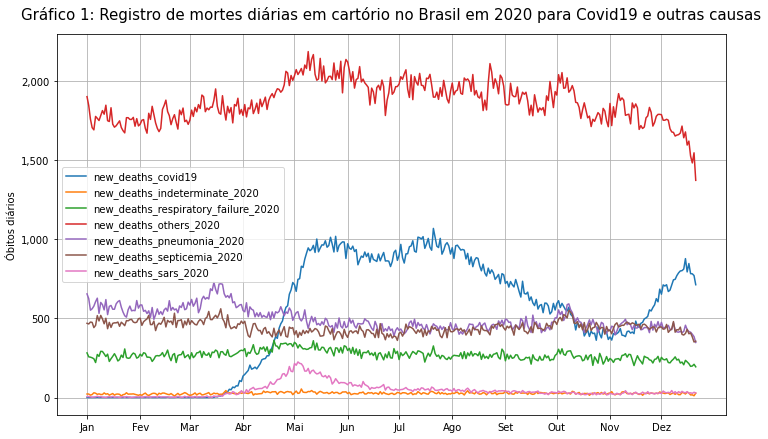

In [42]:
import matplotlib.ticker as ticker

#CRIAR TICKS de meses em X
meses_list = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
meses_posicao= []
 
for i in range(0,366):
  dia = datas[i]
  if dia[-2:]=='01':
    meses_posicao.append(i)

ax = dados_BR[:-10].loc[:,'new_deaths_covid19':'new_deaths_sars_2020'].plot(figsize=(12,7))
ax.xaxis.set_major_locator(ticker.FixedLocator(meses_posicao))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(meses_list))
#formata o eixo y para numero cheio com separador de milhar e 2 casas decimais
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title('Gráfico 1: Registro de mortes diárias em cartório no Brasil em 2020 para Covid19 e outras causas', fontdict={'fontsize':15}, pad=15)
#COLOCAR GRID DIVIDINDO MESES
plt.grid(axis='both')
plt.xlabel('')
plt.ylabel('Óbitos diários')
plt.show()

última data de 2020 é  2020-12-31
O total de mortes por covid19 em 2020 é  189262


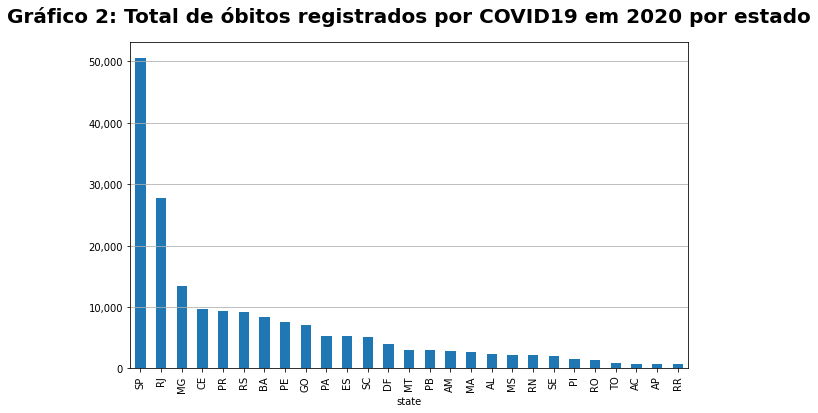

In [43]:
#O total de óbitos no ano de 2020 para um determinado tipo de ocorrência é o seu valor acumulado em 31/12/2020
print('última data de 2020 é ', datas[-1])
 
campos_drop = ['date','new_deaths_indeterminate_2019',
'new_deaths_respiratory_failure_2019',
'new_deaths_others_2019',
'new_deaths_pneumonia_2019',
'new_deaths_septicemia_2019',
'new_deaths_sars_2019',
'new_deaths_covid19',
'new_deaths_indeterminate_2020',
'new_deaths_respiratory_failure_2020',
'new_deaths_others_2020',
'new_deaths_pneumonia_2020',
'new_deaths_septicemia_2020',
'new_deaths_sars_2020',
'new_deaths_total_2019',
'new_deaths_total_2020']
#Definindo dataset com o acumulado de óbitos por categoria de 2020 para cada estado
dados_total_2020 = dados[dados['date']=='2020-12-31'].drop(campos_drop, axis=1)
dados_total_2020.set_index('state', inplace=True)
print('O total de mortes por covid19 em 2020 é ', dados_total_2020['deaths_covid19'].sum())
ax = dados_total_2020['deaths_covid19'].sort_values(ascending=False).plot(x='state', kind='bar', figsize=(10,6))
plt.grid(axis='y')
plt.title('Gráfico 2: Total de óbitos registrados por COVID19 em 2020 por estado', pad=20, fontdict={'fontsize':20, 'fontweight':'bold'})
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

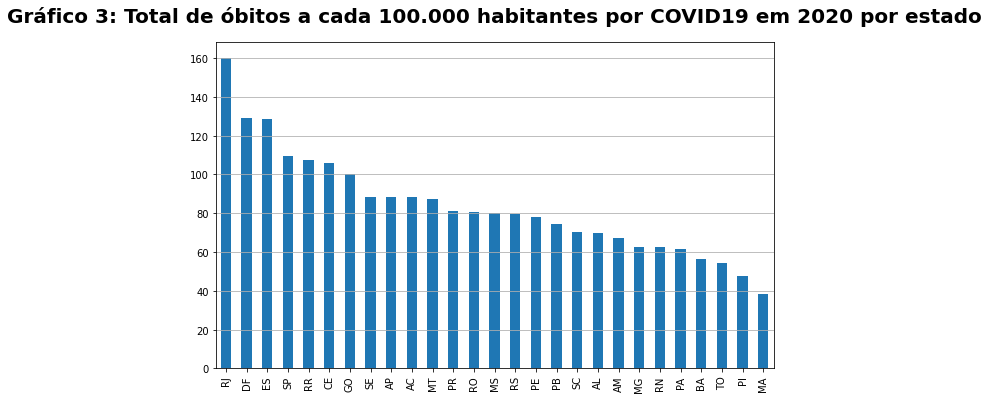

In [44]:
map={'SP':46289333,'MG':21292666,'RJ':17366189,'BA':14930634,'PR':11516840,'RS':11422973,'PE':9616621,'CE':9187103,'PA':8690745,'SC':7252502,'MA':7114598,'GO':7113540,
'AM':4207714,'ES':4064052,'PB':4039277,'RN':3534165,'MT':3526220,'AL':3351543,'PI':3281480,'DF':3055149,'MS':2809394,'SE':2318822,'RO':1796460,'TO':1590248,'AC':894470,
'AP':861773,'RR':631181}

pop_estados = pd.Series(data=map,index=estados)
dados_total_habitante = pd.DataFrame(index=estados)

for causa in dados_total_2020.columns:
  dados_total_habitante[causa] = dados_total_2020[causa]/(pop_estados/100000)


ax = dados_total_habitante['deaths_covid19'].sort_values(ascending=False).plot(kind='bar', figsize=(10,6)) #x='state', 
plt.grid(axis='y')
plt.title('Gráfico 3: Total de óbitos a cada 100.000 habitantes por COVID19 em 2020 por estado', pad=20, fontdict={'fontsize':20, 'fontweight':'bold'})
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

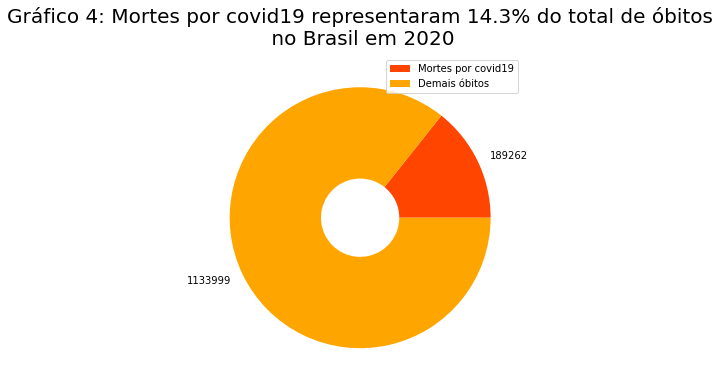

In [45]:
s_total_obitos_por_causa = dados_total_2020.sum()

s_covid_demais = pd.Series([s_total_obitos_por_causa['deaths_covid19'], s_total_obitos_por_causa['deaths_total_2020']-s_total_obitos_por_causa['deaths_covid19']], 
          index=['Mortes por covid19', 'Demais óbitos'])
ax = s_covid_demais.plot.pie(figsize=(6,6), labels=s_covid_demais, wedgeprops=dict(width=0.7), colors=['orangered', 'orange'])
plt.title('Gráfico 4: Mortes por covid19 representaram {}% do total de óbitos\n no Brasil em 2020'.format(round(s_covid_demais[0]*100/s_covid_demais.sum(),2)),
          fontdict={'fontsize':20}, pad=10)
plt.legend(s_covid_demais.index)
plt.ylabel('')
plt.show()


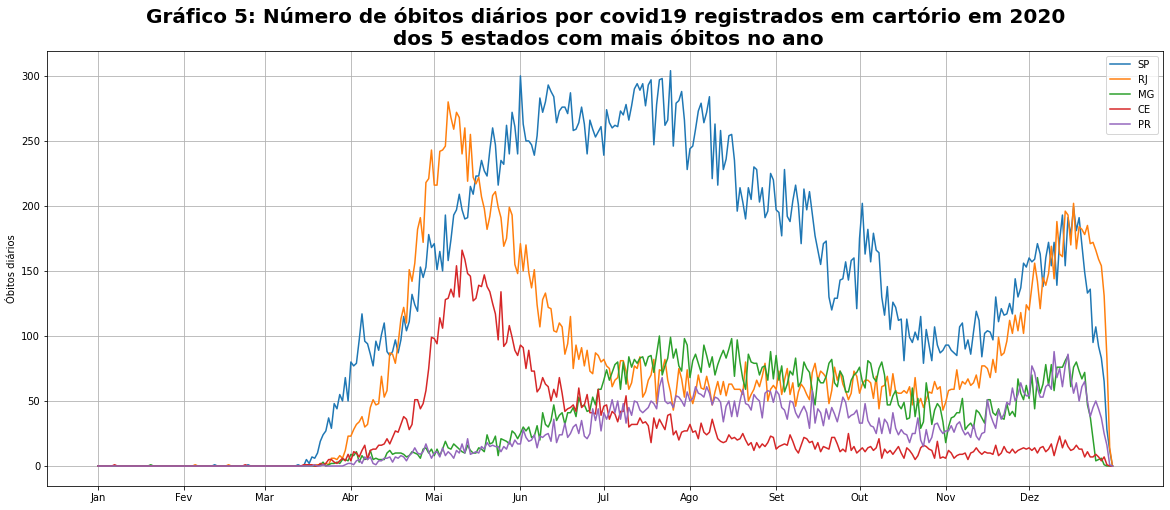

In [46]:
#Criar DataFrame contendo as series de contagem de obitos por covid por estado
dados_covid_estados = pd.DataFrame(index=datas, columns=estados)

for estado in estados:
  df_UF = dados[dados['state'] == estado].set_index('date')
  for i in range(len(datas)):
    dados_covid_estados.loc[datas[i], estado] = df_UF.loc[datas[i], 'new_deaths_covid19']

ax = dados_covid_estados[dados_total_2020['deaths_covid19'].sort_values(ascending=False)[:5].index].plot(figsize=(20,8))
ax.xaxis.set_major_locator(ticker.FixedLocator(meses_posicao))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(meses_list))
plt.title('Gráfico 5: Número de óbitos diários por covid19 registrados em cartório em 2020\n dos 5 estados com mais óbitos no ano', fontdict={'fontweight':'bold', 'fontsize':20})
plt.grid(axis='both')
plt.xlabel('')
plt.ylabel('Óbitos diários')
plt.show()
#ACHAR UM JEITO MELHOR DE FAZER ISSO!!! SEM FOR DENTRO DE FOR


##Conclusões
---
Observando os dados das células anteriores, podemos tirar as seguintes conclusões:
* Mesmo os óbitos por covid19 começarem a ser registrados apenas em Março/2020 **[Gráfico 1]**,
ela foi responsável por mais de 14% de todas as mortes no Brasil no ano **[Gráfico 4]**.
* Ou seja, aproximadamente, **1 em cada 7 óbitos no Brasil em 2020 foram causados pela doença**, segundo os registros.
* Entre os estados, o com maior número de óbitos foi São Paulo **[Gráfico 2]**, porém isso é esperado, pois São Paulo é o estado mais populoso
* Quando levamos em conta a proporção entre óbitos para cada 100.000 habitantes dos estados, São Paulo fica em 4º lugar e o primeiro colocado é o Rio de Janeiro **[Gráfico 3]**. Isso pode ser consequência da adoção de medidas restritivas mais fortes em SP do que no RJ (moro no RJ e percebi bem essa diferença)
* Ao final, pode ser observado no **Gráfico 4** que São Paulo passou por um período longo de máxima no início da pandemia, números que podem ter ajudado a aumentar o estado de alerta e levar a necessidade de medidas mais restritivas no estado. Porém o RJ apresentou um pico curto mas em igualdade de mortes com SP, o que é preocupante, devido à sua população quase 3 vezes inferior à de SP
